In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)

# Style
sns.set(style="whitegrid")

In [2]:
# Load dataset
df = pd.read_csv("barley_yield_from_1982(in).csv", sep=";")

# Preview
df.head()

,Unnamed: 0,department,year,yield,area,production
0,82,Ain,1982,3.95008,16065.0,63458.0
1,83,Ain,1983,NaN,14500.0,38400.0
2,84,Ain,1984,4.82258,15500.0,74750.0
3,85,Ain,1985,4.19677,15500.0,65050.0
4,86,Ain,1986,3.59845,12900.0,46420.0


In [3]:
# Shape of dataset
df.shape

(3583, 6)

In [4]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3583 entries, 0 to 3582
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3583 non-null   int64  
 1   department  3583 non-null   object 
 2   year        3583 non-null   int64  
 3   yield       3336 non-null   float64
 4   area        3468 non-null   float64
 5   production  3461 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 168.1+ KB


In [5]:
# Statistical summary
df.describe()

,Unnamed: 0,year,yield,area,production
count,3583.000000,3583.000000,3336.000000,3468.000000,3461.000000
mean,5805.017862,1999.971532,5.212239,18767.079585,110239.297180
std,3330.517723,10.664744,1.369354,20266.789390,133060.332166
min,82.000000,1982.000000,0.813560,0.000000,0.000000
25%,2945.500000,1991.000000,4.242530,3766.500000,17240.000000
50%,5809.000000,2000.000000,5.261230,11810.500000,56744.900000
75%,8672.500000,2009.000000,6.225615,27495.500000,153285.200000
max,11536.000000,2018.000000,8.400000,119310.000000,919249.600000


In [6]:
df = df.iloc[:, 1:]
df.head()

,department,year,yield,area,production
0,Ain,1982,3.95008,16065.0,63458.0
1,Ain,1983,NaN,14500.0,38400.0
2,Ain,1984,4.82258,15500.0,74750.0
3,Ain,1985,4.19677,15500.0,65050.0
4,Ain,1986,3.59845,12900.0,46420.0


In [7]:
df.isnull().sum()

department      0
year            0
yield         247
area          115
production    122
dtype: int64

In [8]:
df["yield"] = df["yield"].fillna(df["production"] / df["area"])

In [9]:
df.isnull().sum()

department      0
year            0
yield         122
area          115
production    122
dtype: int64

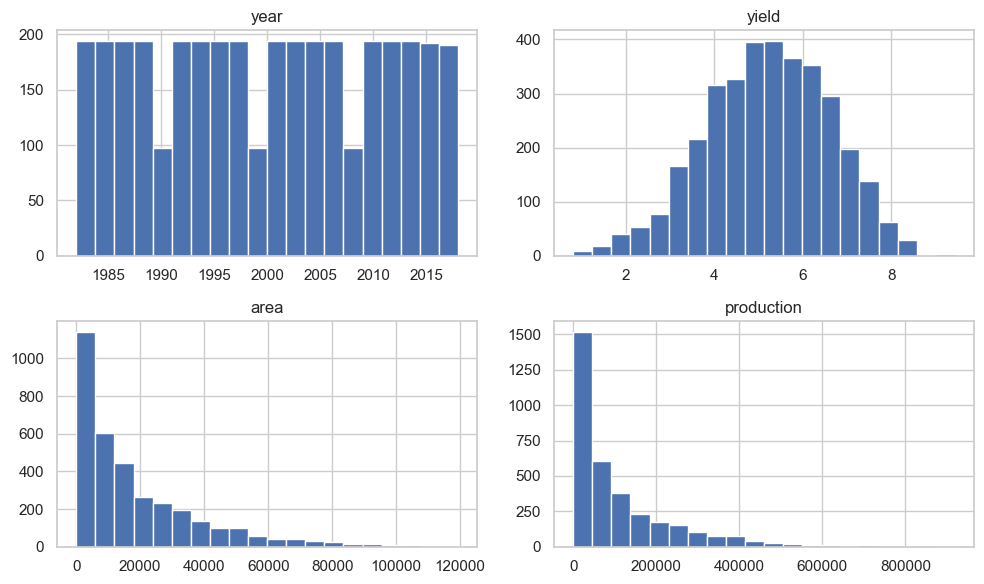

In [10]:
df.hist(figsize=(10,6), bins=20)
plt.tight_layout()
plt.show()


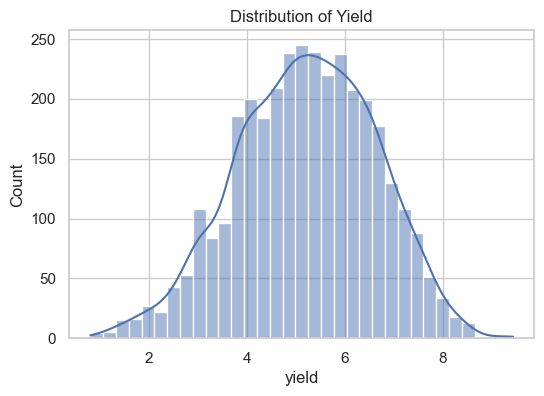

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(df["yield"], kde=True)
plt.title("Distribution of Yield")
plt.show()

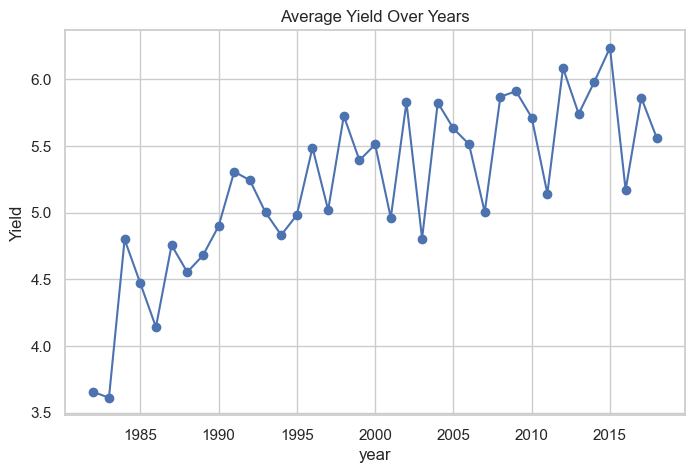

In [13]:
yield_by_year = df.groupby("year")["yield"].mean()

plt.figure(figsize=(8,5))
yield_by_year.plot(marker="o")
plt.title("Average Yield Over Years")
plt.ylabel("Yield")
plt.show()

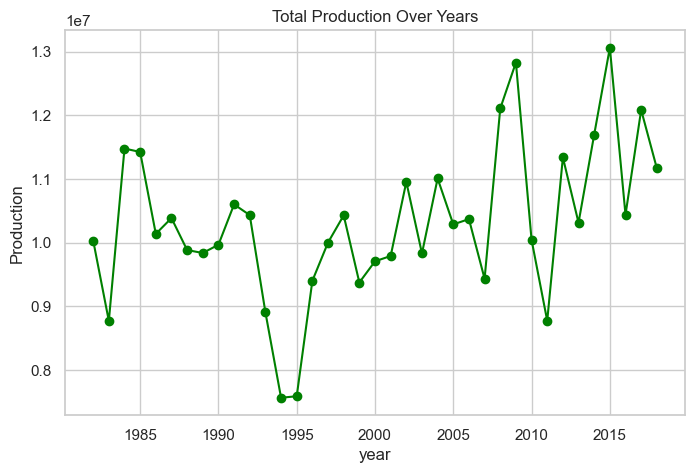

In [14]:
production_by_year = df.groupby("year")["production"].sum()

plt.figure(figsize=(8,5))
production_by_year.plot(marker="o", color="green")
plt.title("Total Production Over Years")
plt.ylabel("Production")
plt.show()

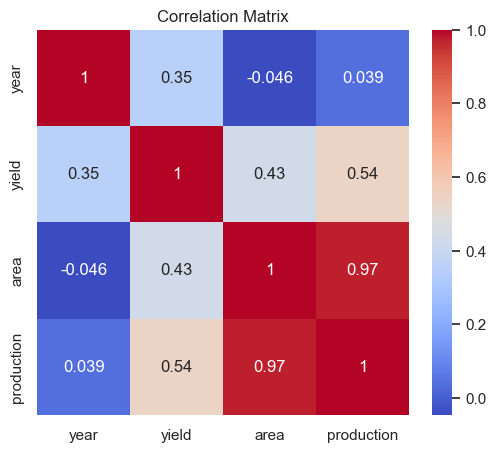

In [15]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

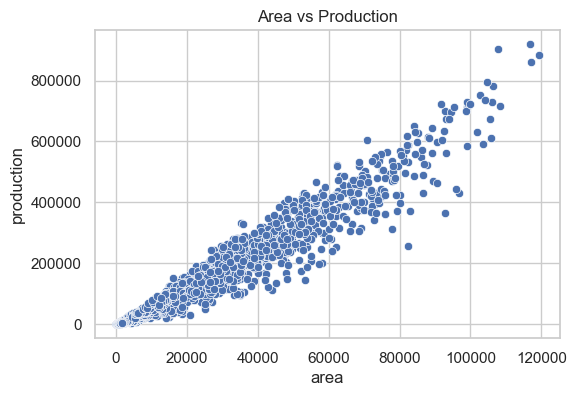

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="area", y="production")
plt.title("Area vs Production")
plt.show()

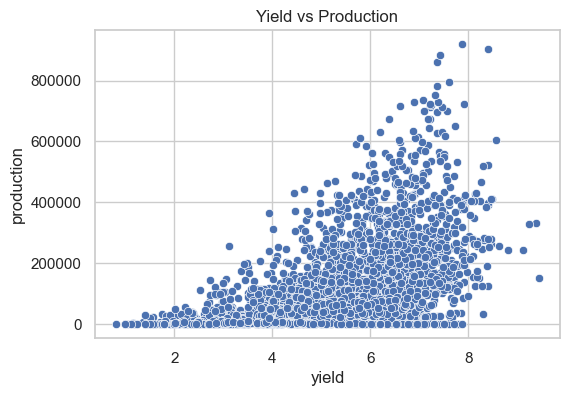

In [17]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="yield", y="production")
plt.title("Yield vs Production")
plt.show()

In [18]:
df["department"].value_counts()

department
Ain                        37
Aisne                      37
Allier                     37
Alpes_de_Haute_Provence    37
Alpes_Maritimes            37
                           ..
Vendee                     37
Yvelines                   37
Vosges                     37
Paris                      34
Seine_SeineOise            34
Name: count, Length: 97, dtype: int64

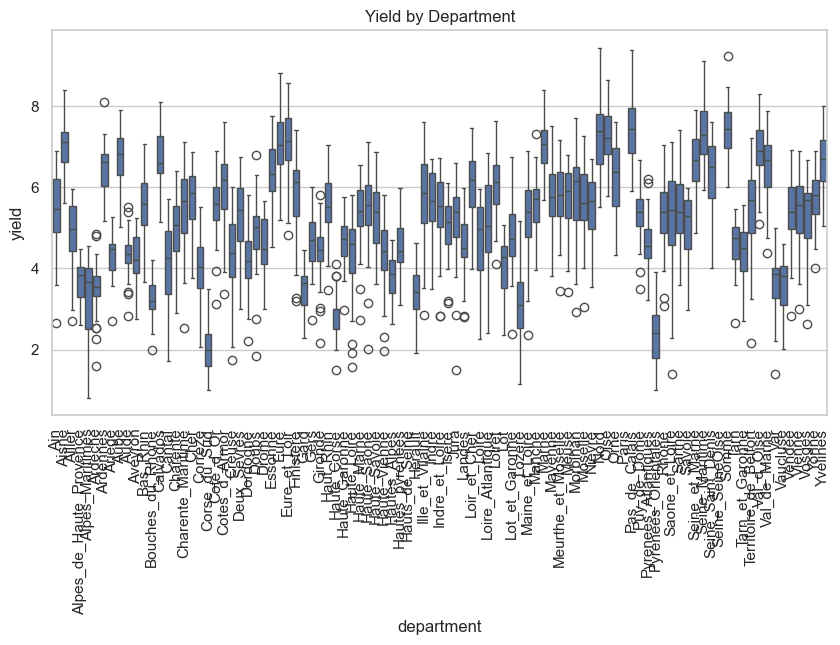

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="department", y="yield")
plt.xticks(rotation=90)
plt.title("Yield by Department")
plt.show()

In [20]:
df.to_csv("cleaned_barley_data.csv", index=False)